# RNN predicting sin/cos

###### see https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/8-RNN_LSTM_Regressor_example.py

Populating the interactive namespace from numpy and matplotlib


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


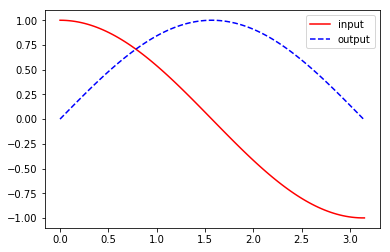

In [85]:
"""
To know more or get code samples, please visit my website:
https://morvanzhou.github.io/tutorials/
Or search: 莫烦Python
Thank you for supporting!
"""

# please note, all tutorial code are running under python3.5.
# If you use the version like python2.7, please modify the code accordingly

# 8 - RNN LSTM Regressor example

# to try tensorflow, un-comment following two lines
# import os
# os.environ['KERAS_BACKEND']='tensorflow'
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam
%pylab inline

BATCH_START = 0
TIME_STEPS = 1
BATCH_SIZE = 100
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006

## 分批次返回 X_batch, Y_batch, 基于一些 xs
## 这里通过定义 global 变量 batch_start, time_steps 实现。个人更推荐用 yield 
def get_batch(make_plot=False):
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    if make_plot:
        plt.plot(xs.reshape(-1), res.reshape(-1), 'r', label = 'input') 
        plt.plot(xs.reshape(-1), seq.reshape(-1), 'b--', label = 'output') 
        plt.legend()
        plt.show()
    return [seq[:,:,np.newaxis], res[:,:,np.newaxis], xs]
get_batch(make_plot=True);

In [86]:
np.ones([3,3]).flatten()

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [87]:

model = Sequential()
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       
    # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    return_sequences=True,      
    # True: output at all steps. False: output as last step.
    stateful=True,              
    # True: the final state of batch1 is feed into the initial state of batch2
))
# add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, )
    if mod(step,10) == 0:
        fig, ax = subplots()
        ax.plot(xs.reshape(-1), Y_batch.reshape(-1), 'r', xs.reshape(-1), pred.reshape(-1)[:len(Y_batch)], 'b--')
        #plt.ylim((-1.2, 1.2))
        #plt.draw()
        #plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(100, 1, 1..., return_sequences=True, stateful=True, units=20)`
  # Remove the CWD from sys.path while we load stuff.


Training ------------


ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 100 samples. Batch size: 32.

In [81]:
xs.shape, X_batch.shape, Y_batch.shape, pred.shape

((100, 1), (100, 1), (100, 1), (50, 20, 1))